In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Upload usual Libraries to manipulating data

import pandas as pd
import numpy as np

# Library to data preprocessing 
from sklearn.model_selection import train_test_split

# libaries to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as SM
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


# To get diferent metric scores
import sklearn.metrics as metrics


In [2]:
## Let's upload the dataset
data = pd.read_excel('CompData-1.xlsx')

In [3]:
## let's print first 5 rows of the data 
data.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.08

In [4]:
## Let's print last 5 rowas as well
data.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,0.848020,0.217591,7.200000e+09,0.000469,0.264462,0.377510,0.063886,0.057269,0.630612,0.000692,0.006091,0.191811,0.079460,0.000808,0.007836,8.040000e+09,1.989590e-04,0.018226,0.397899,0.008839,0.751271,0.380923,0.058189,0.084897,0.384342,0.277025,0.015041,0.000000,0.958918,0.002525,0.026074,0.000422,4.067910e-04,5.409530e-04,0.191522,0.700703,0.519602,0.599051,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,0.847997,0.217638,6.120000e+09,0.000441,0.263757,0.380146,0.009020,0.007749,0.635034,0.002933,0.005066,0.168404,0.086957,0.000751,0.008416,3.894070e-04,6.810000e+09,0.021452,0.393049,0.019264,0.239210,0.019138,0.008082,0.001855,0.348742,0.277150,0.002779,0.008962,0.929682,0.002231,0.020147,0.000111,1.070200e-04,2.340000e+09,0.673855,0.624767,0.453011,0.583909,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,0.847818,0.217524,5.360000e+09,0.000408,0.262483,0.387458,0.007053,0.005830,0.630303,0.002848,0.005169,0.153985,0.023988,0.000337,0.018775,3.051440e-04,2.190000e+09,0.012258,0.376054,0.036312,0.174692,0.019911,0.006941,0.002252,0.375585,0.277087,0.000648,0.016321,0.919307,0.001873,0.017716,0.000273,2.813850e-04,8.240000e+09,0.535405,0.631151,0.455126,0.646378,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,0.848115,0.217588,5.730000e+09,0.000420,0.263713,0.382372,0.014462,0.008618,0.631224,0.002686,0.005162,0.172823,0.092954,0.001049,0.006030,8.960000e+08,1.036400e-04,0.021774,0.404514,0.039938,0.185860,0.036252,0.008620,0.004776,0.362684,0.277326,0.015431,0.001127,0.934556,0.002394,0.009717,0.000119,7.380000e+09,4.050000e+09,0.498760,0.651743,0.462513,0.614016,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,0.848183,0.217647,8.720000e+09,0.000618,0.268608,0.418911,0.009290,0.003041,0.630733,0.013167,0.008407,0.179247,0.163418,0.001211,0.005217,2.920000e+09,2.025144e-03,0.057419,0.395

In [5]:
## let's check the shape of the data
print (f"the data have {data.shape[0]} rows \n and have {data.shape[1]} columns")

the data have 2058 rows 
 and have 58 columns


In [6]:
## let's check the data type over the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

#### Observations
- we observe that the data have 53 d.type of float64 , 4 d.type int64, and 1 d.type as object.
- also, we observe some missing data, will treat them later on!

### Treating Missing values

In [7]:
## Create copy of the data
## let's drop columns names "Co_Code " and "Co_Name " as they have no added value in this stage
data_temp = data.copy()
data_temp = data_temp.drop(columns=["Co_Code", "Co_Name"])

In [8]:
## check the missing data
data_temp.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

#### Opesrvations 
we may decided between using mean or median to fill null values based on their distribution. If there are outliers, will use the median, else; Mean

<Axes: xlabel='_Cash_Flow_Per_Share'>

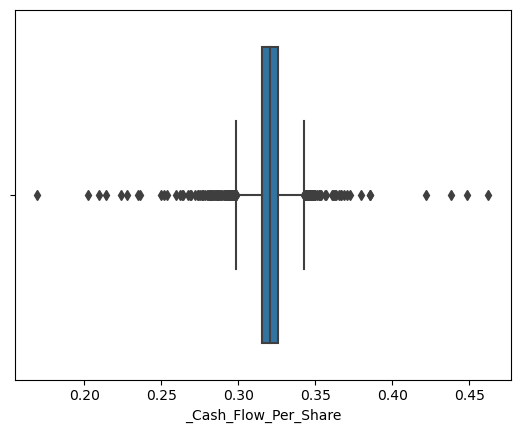

In [9]:
## let's check box plot for _Cash_Flow_Per_Share
sns.boxplot(data,x = '_Cash_Flow_Per_Share')

<Axes: xlabel='_Total_debt_to_Total_net_worth'>

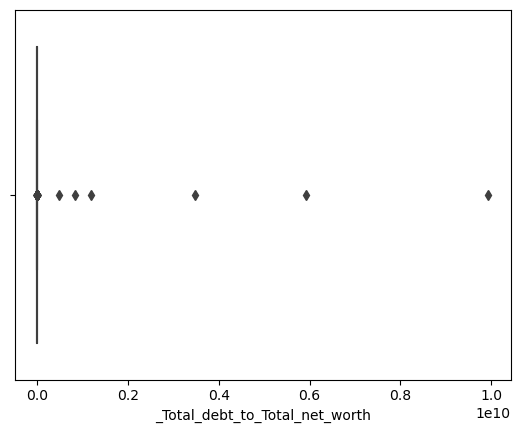

In [10]:
## let's check for _Total_debt_to_Total_net_worth
sns.boxplot(data,x = '_Total_debt_to_Total_net_worth')

<Axes: xlabel='_Cash_to_Total_Assets'>

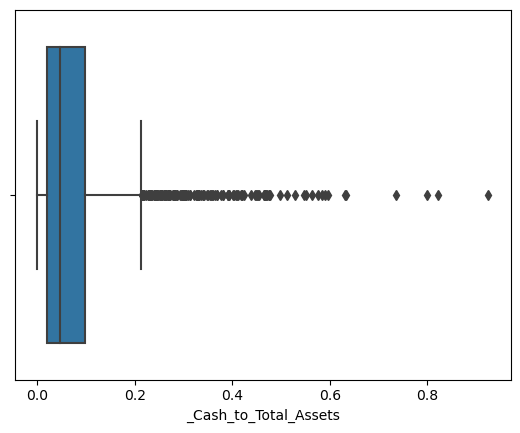

In [11]:
## let's check for _Cash_to_Total_Assets
sns.boxplot(data,x = '_Cash_to_Total_Assets')

<Axes: xlabel='_Current_Liability_to_Current_Assets'>

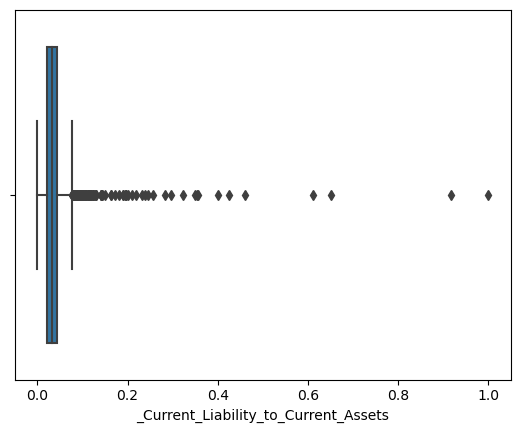

In [12]:
## Let's check for ## let's check for _Current_Liability_to_Current_Assets
sns.boxplot(data,x = '_Current_Liability_to_Current_Assets')

#### Observations
- as observed that all of them having outliers, then will treat the missing values using the median of each column respectively

In [13]:
## let's take the median of the original data as well to track the changes, if any!
data.median()

Co_Code                                              6.240000e+03
_Operating_Expense_Rate                              3.330330e-04
_Research_and_development_expense_rate               1.994130e-04
_Cash_flow_rate                                      4.634450e-01
_Interest_bearing_debt_interest_rate                 4.540450e-04
_Tax_rate_A                                          3.709890e-02
_Cash_Flow_Per_Share                                 3.206479e-01
_Per_Share_Net_profit_before_tax_Yuan_               1.756421e-01
_Realized_Sales_Gross_Profit_Growth_Rate             2.210001e-02
_Operating_Profit_Growth_Rate                        8.480386e-01
_Continuous_Net_Profit_Growth_Rate                   2.175961e-01
_Total_Asset_Growth_Rate                             6.225000e+09
_Net_Value_Growth_Rate                               4.554170e-04
_Total_Asset_Return_Growth_Rate_Ratio                2.640161e-01
_Cash_Reinvestment_perc                              3.789678e-01
_Current_R

In [14]:
## let's write the copde to impute the missing with median of respective column
data_temp.fillna(data_temp.median(axis=0), inplace=True)

In [15]:
data_temp.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

#### Observations
- looks like null values have been replaced with Nan

In [16]:
## let;s check if the median has been changed from orginal data
print(data_temp.median() - data.median())

Co_Code                                              NaN
Default                                              0.0
_Accounts_Receivable_Turnover                        0.0
_Allocation_rate_per_person                          0.0
_Average_Collection_Days                             0.0
_CFO_to_Assets                                       0.0
_Cash_Flow_Per_Share                                 0.0
_Cash_Flow_to_Equity                                 0.0
_Cash_Flow_to_Liability                              0.0
_Cash_Flow_to_Total_Assets                           0.0
_Cash_Reinvestment_perc                              0.0
_Cash_Turnover_Rate                                  0.0
_Cash_flow_rate                                      0.0
_Cash_to_Current_Liability                           0.0
_Cash_to_Total_Assets                                0.0
_Continuous_Net_Profit_Growth_Rate                   0.0
_Current_Asset_Turnover_Rate                         0.0
_Current_Liability_to_Current_A

#### Observations
- no difference 

In [17]:
## let's check Nan
data_temp.isna().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

### Treating Outliers

In [18]:
## before that let's check the Default dist.
data_temp.Default.value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [19]:
## let's check the percentage
data_temp.Default.value_counts(normalize=True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [20]:
data_temp.shape

(2058, 56)

In [21]:
Default_X = data_temp.drop('Default', axis = 1)
Default_Y = data_temp['Default']

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in Default_X.columns:
    lr,ur=remove_outlier(data_temp[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])

In [24]:
Default_X.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.003519,0.000452,7.070000e+08,0.000305,0.029839,0.415152,0.054430,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0.0,0.016143,0.622251,0.026930,0.565744,1.0,0.015338
1,9.380000e+09,3.875000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021918,0.847763,0.217506,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628913,0.006812,0.005230,0.160682,0.056972,0.000306,0.016233,2.782020e-04,0.020716,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0.0,0.006191,0.622513,0.026395,0.563546,1.0,0.029445
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.301182,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,0.000149,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.313048,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.022293,0.848326,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.008295,0.172159,0.101949,0.003519,0.001169,1.340000e+09,0.001827,0.028387,0.415152,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.027542,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,0.000830,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-04,5.670000e+09,0.103

#### Observations
- now all outliers have been trated

In [25]:
data_temp = pd.concat([Default_X, Default_Y], axis = 1)

In [26]:
data_temp.shape

(2058, 56)

In [27]:
data_temp.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.003519,0.000452,7.070000e+08,0.000305,0.029839,0.415152,0.054430,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0.0,0.016143,0.622251,0.026930,0.565744,1.0,0.015338,0
1,9.380000e+09,3.875000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021918,0.847763,0.217506,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628913,0.006812,0.005230,0.160682,0.056972,0.000306,0.016233,2.782020e-04,0.020716,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0.0,0.006191,0.622513,0.026395,0.563546,1.0,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.301182,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,0.000149,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.313048,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.022293,0.848326,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.008295,0.172159,0.101949,0.003519,0.001169,1.340000e+09,0.001827,0.028387,0.415152,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.027542,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,0.000830,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-04,5.

### Univariate and Bivariate
We shall prioritize interpreting the most important features after we identify the best model. Understanding these key features will provide the organization with valuable insights, as they have a significant impact on the target variable compared to less influential features.

### Variables Correlation  


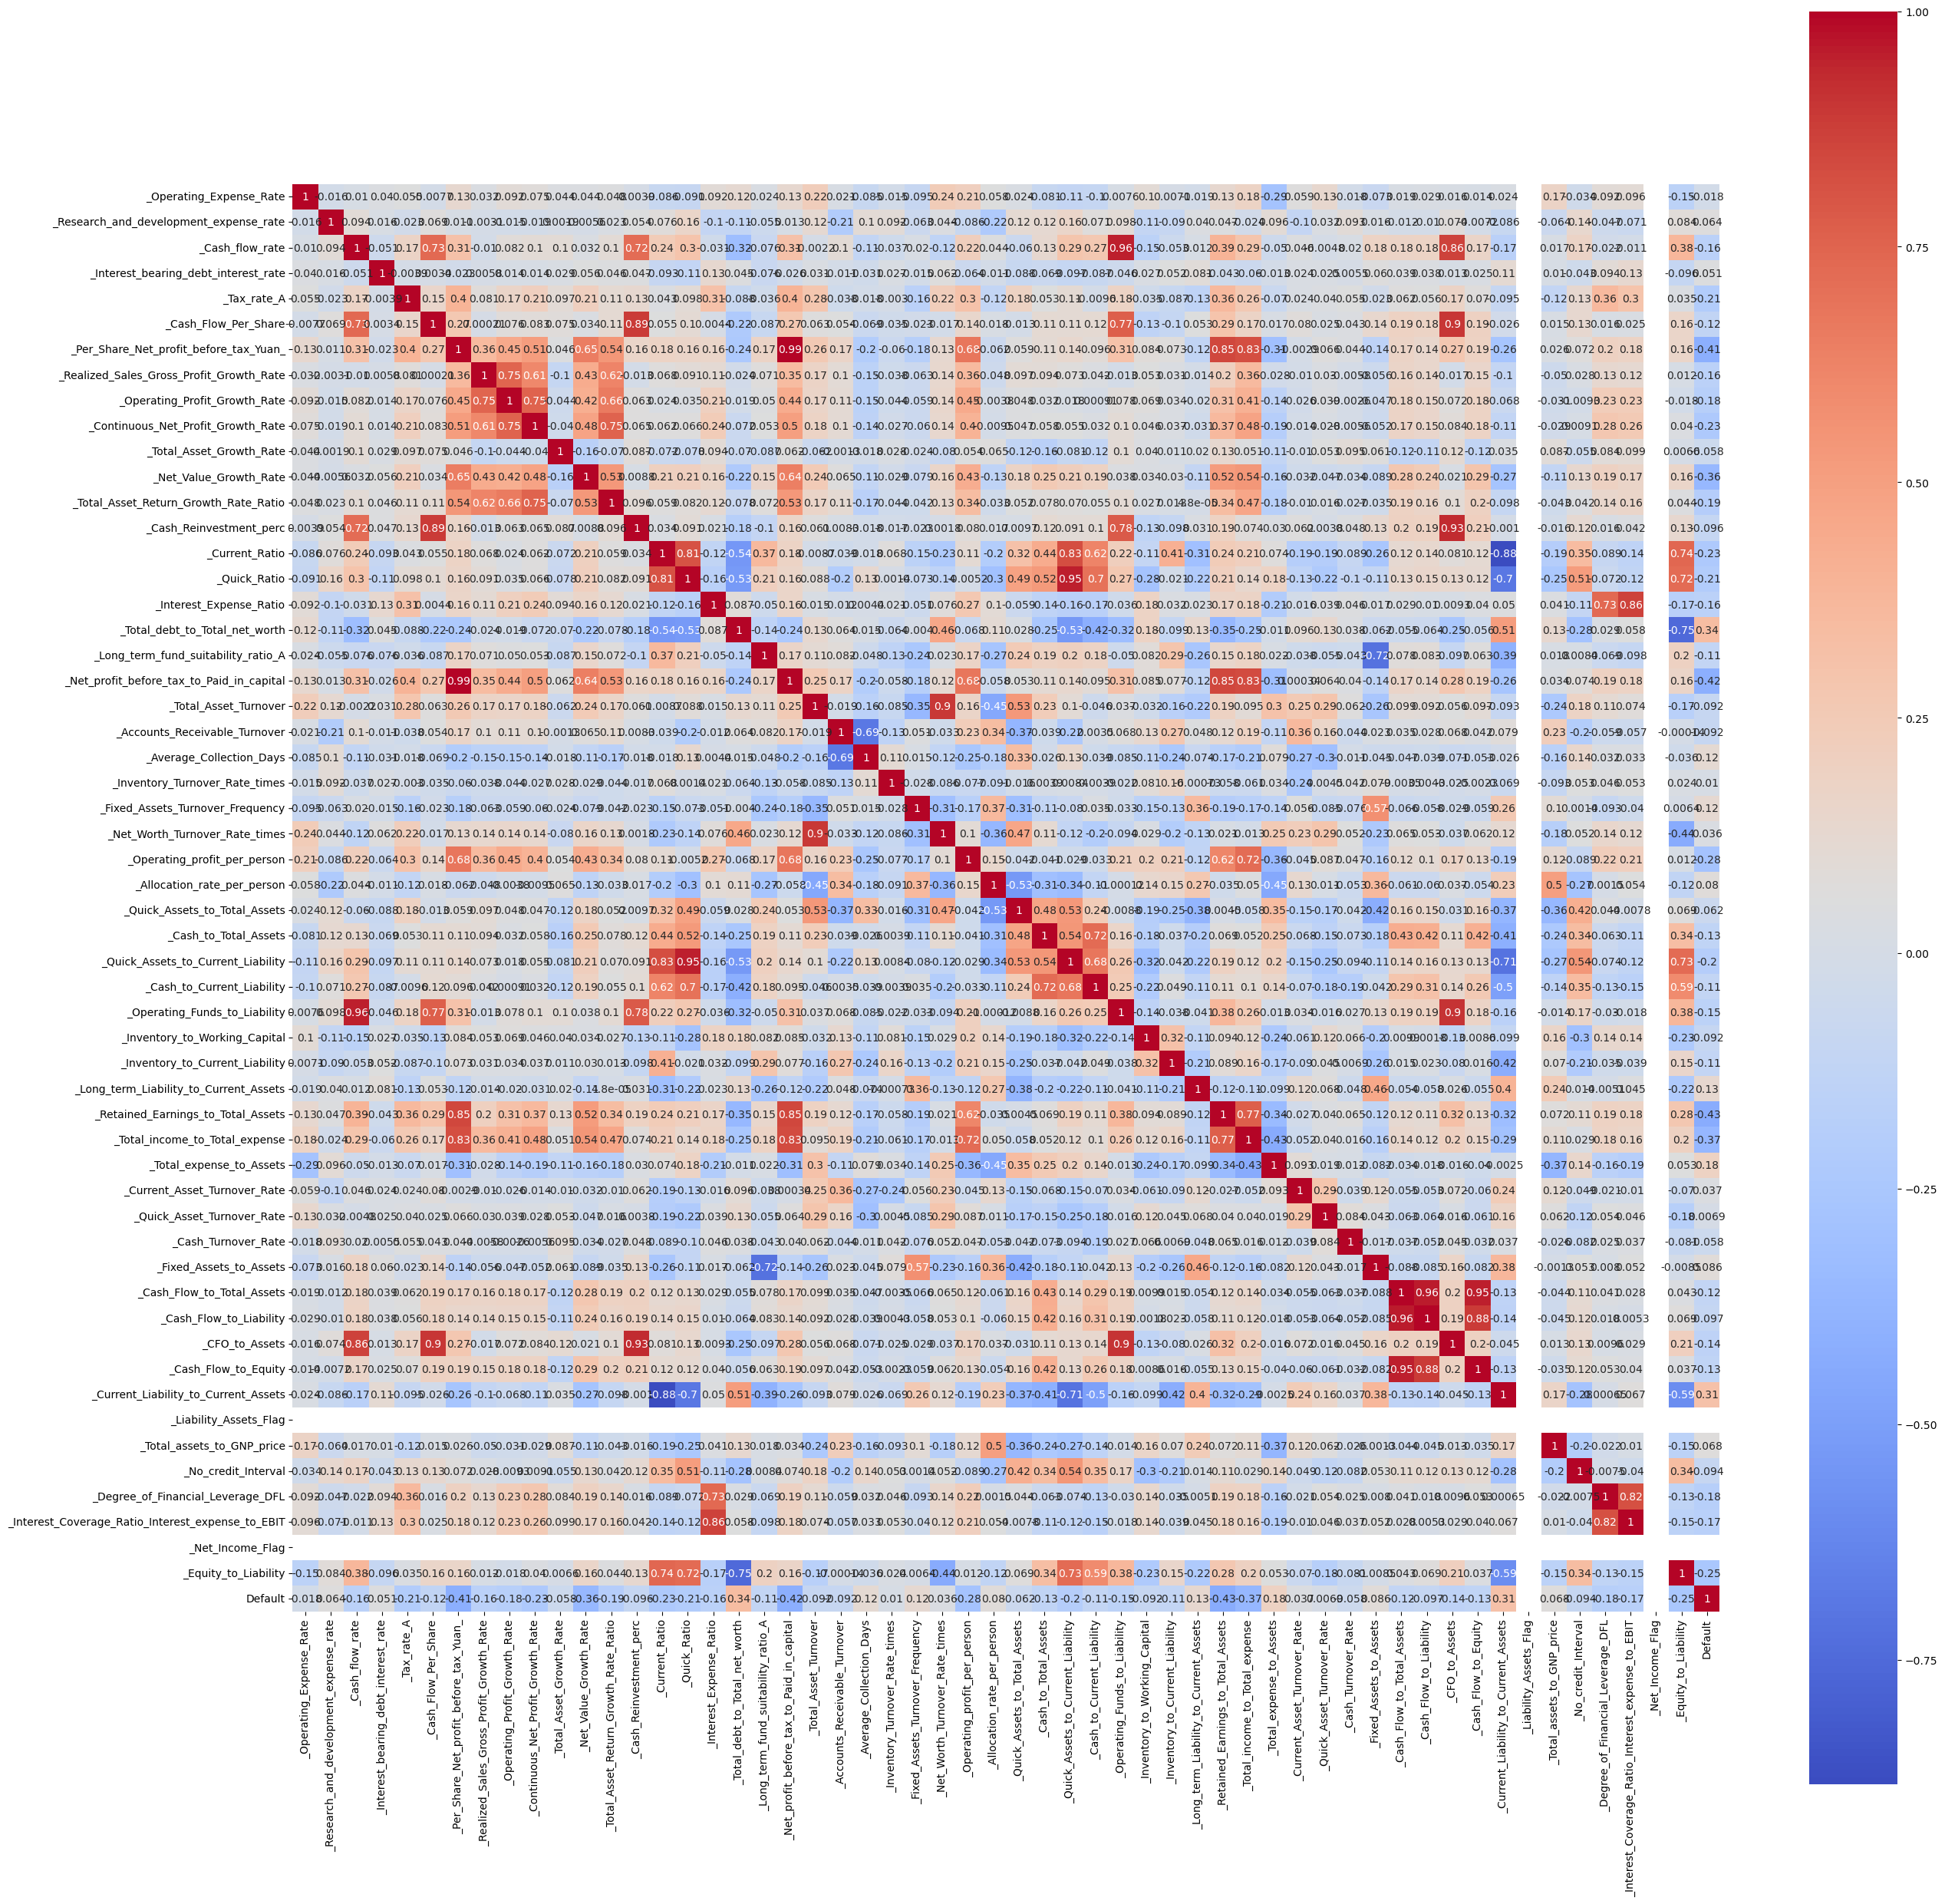

In [28]:
plt.figure(figsize=(30,30))  
p=sns.heatmap(data_temp.corr(), annot=True,cmap='coolwarm',square=True)

#### Observations
Usually, we like to see how all our variables are correlated with each other. For small datasets, we can use charts like pair plots or heatmaps. But with 56 variables, those charts would become too complicated to understand.

Instead, we can skip this step for now and focus on building our model. Later, we can use a test called the Variance Inflation Factor (VIF) to check for multicollinearity

#### Observation2
- We observe that these cols '_Net_Income_Flag','_Liability_Assets_Flag' looks like categorecal features, i guess we may drop them before buiding the model

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
X = data_temp.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,100.447256
19,_Net_profit_before_tax_to_Paid_in_capital,99.820247
43,_Cash_Flow_to_Total_Assets,44.520933
45,_CFO_to_Assets,29.024952
32,_Operating_Funds_to_Liability,21.595156
30,_Quick_Assets_to_Current_Liability,19.822139
44,_Cash_Flow_to_Liability,17.863419
2,_Cash_flow_rate,16.462224
46,_Cash_Flow_to_Equity,15.115310
25,_Net_Worth_Turnover_Rate_times,15.057535


In [31]:
X = X.drop('_Liability_Assets_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,100.447548
19,_Net_profit_before_tax_to_Paid_in_capital,99.820231
43,_Cash_Flow_to_Total_Assets,44.520307
45,_CFO_to_Assets,29.024881
32,_Operating_Funds_to_Liability,21.595295
30,_Quick_Assets_to_Current_Liability,19.822126
44,_Cash_Flow_to_Liability,17.863380
2,_Cash_flow_rate,16.462223
46,_Cash_Flow_to_Equity,15.115312
25,_Net_Worth_Turnover_Rate_times,15.057675


In [32]:
X = X.drop('_Net_Income_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,99.804297
19,_Net_profit_before_tax_to_Paid_in_capital,99.332724
43,_Cash_Flow_to_Total_Assets,44.483838
45,_CFO_to_Assets,28.999992
32,_Operating_Funds_to_Liability,21.585036
30,_Quick_Assets_to_Current_Liability,19.815181
44,_Cash_Flow_to_Liability,17.841750
2,_Cash_flow_rate,16.461076
46,_Cash_Flow_to_Equity,15.114859
25,_Net_Worth_Turnover_Rate_times,15.036081


In [33]:
X = X.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
42,_Cash_Flow_to_Total_Assets,44.460814
44,_CFO_to_Assets,28.780854
31,_Operating_Funds_to_Liability,21.558271
29,_Quick_Assets_to_Current_Liability,19.808856
43,_Cash_Flow_to_Liability,17.841721
2,_Cash_flow_rate,16.459952
45,_Cash_Flow_to_Equity,15.089129
24,_Net_Worth_Turnover_Rate_times,15.034153
13,_Current_Ratio,14.695558
19,_Total_Asset_Turnover,14.111786


In [34]:
X = X.drop('_Cash_Flow_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
43,_CFO_to_Assets,28.570743
31,_Operating_Funds_to_Liability,21.525155
29,_Quick_Assets_to_Current_Liability,19.781036
2,_Cash_flow_rate,16.436355
24,_Net_Worth_Turnover_Rate_times,15.040672
13,_Current_Ratio,14.686297
19,_Total_Asset_Turnover,14.108550
12,_Cash_Reinvestment_perc,12.967008
14,_Quick_Ratio,12.509735
18,_Net_profit_before_tax_to_Paid_in_capital,8.334485


In [35]:
X = X.drop('_CFO_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,19.776682
31,_Operating_Funds_to_Liability,18.754052
2,_Cash_flow_rate,16.049315
24,_Net_Worth_Turnover_Rate_times,15.018133
13,_Current_Ratio,14.675756
19,_Total_Asset_Turnover,14.093487
14,_Quick_Ratio,12.508944
18,_Net_profit_before_tax_to_Paid_in_capital,8.125672
44,_Current_Liability_to_Current_Assets,8.021755
12,_Cash_Reinvestment_perc,6.605020


In [36]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,_Operating_Funds_to_Liability,18.600666
2,_Cash_flow_rate,15.830728
24,_Net_Worth_Turnover_Rate_times,14.992829
19,_Total_Asset_Turnover,14.011388
13,_Current_Ratio,12.945401
18,_Net_profit_before_tax_to_Paid_in_capital,8.103618
43,_Current_Liability_to_Current_Assets,7.947040
14,_Quick_Ratio,7.931448
12,_Cash_Reinvestment_perc,6.605087
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.084793


In [37]:
X = X.drop('_Operating_Funds_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,_Net_Worth_Turnover_Rate_times,14.871459
19,_Total_Asset_Turnover,13.883133
13,_Current_Ratio,12.786782
18,_Net_profit_before_tax_to_Paid_in_capital,8.061985
42,_Current_Liability_to_Current_Assets,7.935566
14,_Quick_Ratio,7.823959
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.075704
12,_Cash_Reinvestment_perc,5.872433
5,_Cash_Flow_Per_Share,5.765619
27,_Quick_Assets_to_Total_Assets,5.388411


In [38]:
X = X.drop('_Net_Worth_Turnover_Rate_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Current_Ratio,12.740902
18,_Net_profit_before_tax_to_Paid_in_capital,8.021982
41,_Current_Liability_to_Current_Assets,7.926998
14,_Quick_Ratio,7.764620
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.075126
12,_Cash_Reinvestment_perc,5.870650
5,_Cash_Flow_Per_Share,5.764877
26,_Quick_Assets_to_Total_Assets,5.386911
46,_Equity_to_Liability,5.315891
33,_Total_income_to_Total_expense,5.142439


In [39]:
X = X.drop('_Current_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,_Net_profit_before_tax_to_Paid_in_capital,8.012054
13,_Quick_Ratio,6.256644
44,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.074172
12,_Cash_Reinvestment_perc,5.868263
5,_Cash_Flow_Per_Share,5.761544
25,_Quick_Assets_to_Total_Assets,5.381585
32,_Total_income_to_Total_expense,5.141631
31,_Retained_Earnings_to_Total_Assets,5.131254
39,_Cash_Flow_to_Equity,5.129169
40,_Current_Liability_to_Current_Assets,5.025961


In [40]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Quick_Ratio,6.244979
43,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.040355
12,_Cash_Reinvestment_perc,5.829841
5,_Cash_Flow_Per_Share,5.653638
24,_Quick_Assets_to_Total_Assets,5.381515
38,_Cash_Flow_to_Equity,5.095237
39,_Current_Liability_to_Current_Assets,5.021990
37,_Cash_Flow_to_Liability,4.929156
44,_Equity_to_Liability,4.821655
36,_Fixed_Assets_to_Assets,4.690739


In [41]:
X = X.drop('_Quick_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
42,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.040354
12,_Cash_Reinvestment_perc,5.829857
5,_Cash_Flow_Per_Share,5.624146
37,_Cash_Flow_to_Equity,5.095017
36,_Cash_Flow_to_Liability,4.929004
23,_Quick_Assets_to_Total_Assets,4.818786
35,_Fixed_Assets_to_Assets,4.620876
13,_Interest_Expense_Ratio,4.482501
30,_Total_income_to_Total_expense,4.343775
43,_Equity_to_Liability,4.130513


In [42]:
X = X.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,_Cash_Reinvestment_perc,5.828624
5,_Cash_Flow_Per_Share,5.622050
37,_Cash_Flow_to_Equity,5.093433
36,_Cash_Flow_to_Liability,4.925408
23,_Quick_Assets_to_Total_Assets,4.808235
35,_Fixed_Assets_to_Assets,4.619590
30,_Total_income_to_Total_expense,4.343246
42,_Equity_to_Liability,4.123429
38,_Current_Liability_to_Current_Assets,4.053770
29,_Retained_Earnings_to_Total_Assets,3.747419


In [43]:
X = X.drop('_Cash_Reinvestment_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
37,_Current_Liability_to_Current_Assets,18.988567
36,_Cash_Flow_to_Equity,5.044102
35,_Cash_Flow_to_Liability,4.891271
22,_Quick_Assets_to_Total_Assets,4.808009
34,_Fixed_Assets_to_Assets,4.595839
29,_Total_income_to_Total_expense,4.247947
41,_Equity_to_Liability,4.117204
28,_Retained_Earnings_to_Total_Assets,3.688025
24,_Cash_to_Current_Liability,3.643735
15,_Total_Asset_Turnover,3.485338


In [44]:
X = X.drop('_Current_Liability_to_Current_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,_Continuous_Net_Profit_Growth_Rate,6.504674e+07
38,_No_credit_Interval,1.087069e+06
25,_Inventory_to_Working_Capital,2.496098e+05
6,_Realized_Sales_Gross_Profit_Growth_Rate,1.123027e+05
39,_Degree_of_Financial_Leverage_DFL,2.079198e+04
29,_Total_income_to_Total_expense,4.611599e+02
10,_Net_Value_Growth_Rate,1.825899e+02
14,_Long_term_fund_suitability_ratio_A,8.767613e+01
21,_Allocation_rate_per_person,5.483819e+00
36,_Cash_Flow_to_Equity,5.041210e+00


In [45]:
X = X.drop('_Continuous_Net_Profit_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
37,_No_credit_Interval,1.087001e+06
24,_Inventory_to_Working_Capital,2.495942e+05
6,_Realized_Sales_Gross_Profit_Growth_Rate,1.060565e+05
38,_Degree_of_Financial_Leverage_DFL,2.075863e+04
28,_Total_income_to_Total_expense,4.530322e+02
9,_Net_Value_Growth_Rate,1.823832e+02
20,_Allocation_rate_per_person,5.479109e+00
35,_Cash_Flow_to_Equity,5.041054e+00
34,_Cash_Flow_to_Liability,4.878962e+00
33,_Fixed_Assets_to_Assets,4.571754e+00


In [46]:
X = X.drop('_No_credit_Interval', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,_Inventory_to_Working_Capital,248914.230871
6,_Realized_Sales_Gross_Profit_Growth_Rate,105455.706267
37,_Degree_of_Financial_Leverage_DFL,20754.509634
28,_Total_income_to_Total_expense,451.750062
9,_Net_Value_Growth_Rate,182.033959
20,_Allocation_rate_per_person,5.442935
35,_Cash_Flow_to_Equity,5.038478
34,_Cash_Flow_to_Liability,4.878702
33,_Fixed_Assets_to_Assets,4.512559
3,_Interest_bearing_debt_interest_rate,4.024855


In [47]:
X = X.drop('_Inventory_to_Working_Capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Realized_Sales_Gross_Profit_Growth_Rate,105433.435312
36,_Degree_of_Financial_Leverage_DFL,20711.579425
27,_Total_income_to_Total_expense,450.354556
9,_Net_Value_Growth_Rate,181.924285
20,_Allocation_rate_per_person,5.438551
34,_Cash_Flow_to_Equity,5.038445
33,_Cash_Flow_to_Liability,4.877581
32,_Fixed_Assets_to_Assets,4.464475
3,_Interest_bearing_debt_interest_rate,4.022612
37,_Equity_to_Liability,3.805509


In [48]:
X = X.drop('_Realized_Sales_Gross_Profit_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,_Degree_of_Financial_Leverage_DFL,20650.755944
26,_Total_income_to_Total_expense,445.832154
8,_Net_Value_Growth_Rate,179.568835
19,_Allocation_rate_per_person,5.438531
33,_Cash_Flow_to_Equity,5.032535
32,_Cash_Flow_to_Liability,4.865072
31,_Fixed_Assets_to_Assets,4.460872
3,_Interest_bearing_debt_interest_rate,4.021799
36,_Equity_to_Liability,3.800170
20,_Quick_Assets_to_Total_Assets,3.691550


In [49]:
X = X.drop('_Degree_of_Financial_Leverage_DFL', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,_Total_income_to_Total_expense,445.642448
8,_Net_Value_Growth_Rate,179.317657
19,_Allocation_rate_per_person,5.437633
33,_Cash_Flow_to_Equity,5.029541
32,_Cash_Flow_to_Liability,4.861684
31,_Fixed_Assets_to_Assets,4.460855
35,_Equity_to_Liability,3.797355
20,_Quick_Assets_to_Total_Assets,3.686797
25,_Retained_Earnings_to_Total_Assets,3.577283
22,_Cash_to_Current_Liability,3.462783


In [50]:
X = X.drop('_Total_income_to_Total_expense', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,_Net_Value_Growth_Rate,176.318984
19,_Allocation_rate_per_person,5.411825
32,_Cash_Flow_to_Equity,5.026809
31,_Cash_Flow_to_Liability,4.861588
30,_Fixed_Assets_to_Assets,4.415987
34,_Equity_to_Liability,3.797290
20,_Quick_Assets_to_Total_Assets,3.665304
22,_Cash_to_Current_Liability,3.460604
13,_Total_Asset_Turnover,3.427820
21,_Cash_to_Total_Assets,3.377196


In [51]:
X = X.drop('_Net_Value_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,_Allocation_rate_per_person,5.390907
31,_Cash_Flow_to_Equity,4.954309
30,_Cash_Flow_to_Liability,4.853522
29,_Fixed_Assets_to_Assets,4.372392
3,_Interest_bearing_debt_interest_rate,3.974159
33,_Equity_to_Liability,3.796684
19,_Quick_Assets_to_Total_Assets,3.655756
21,_Cash_to_Current_Liability,3.458790
12,_Total_Asset_Turnover,3.409154
20,_Cash_to_Total_Assets,3.362800


In [52]:
X = X.drop('_Allocation_rate_per_person', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,_Cash_Flow_to_Equity,4.953050
29,_Cash_Flow_to_Liability,4.852434
28,_Fixed_Assets_to_Assets,4.328855
3,_Interest_bearing_debt_interest_rate,3.965694
32,_Equity_to_Liability,3.778039
18,_Quick_Assets_to_Total_Assets,3.655154
20,_Cash_to_Current_Liability,3.424342
19,_Cash_to_Total_Assets,3.340714
12,_Total_Asset_Turnover,3.300901
2,_Cash_flow_rate,3.002756


In [53]:
X = X.drop('_Cash_Flow_to_Equity', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Operating_Profit_Growth_Rate,667273.142435
28,_Fixed_Assets_to_Assets,4.327731
31,_Equity_to_Liability,3.772034
18,_Quick_Assets_to_Total_Assets,3.648634
20,_Cash_to_Current_Liability,3.377085
12,_Total_Asset_Turnover,3.295013
19,_Cash_to_Total_Assets,3.247148
2,_Cash_flow_rate,3.001762
10,_Total_debt_to_Total_net_worth,2.806311
11,_Long_term_fund_suitability_ratio_A,2.734038


In [54]:
X = X.drop('_Operating_Profit_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Total_Asset_Return_Growth_Rate_Ratio,182960.153001
8,_Interest_Expense_Ratio,170148.562340
22,_Retained_Earnings_to_Total_Assets,14640.251320
28,_Cash_Flow_to_Liability,13018.763848
2,_Cash_flow_rate,11449.865802
16,_Operating_profit_per_person,3215.535458
5,_Cash_Flow_Per_Share,3041.390087
10,_Long_term_fund_suitability_ratio_A,83.851128
30,_Equity_to_Liability,16.038154
27,_Fixed_Assets_to_Assets,11.152338


In [55]:
X = X.drop('_Total_Asset_Return_Growth_Rate_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Interest_Expense_Ratio,22656.421906
21,_Retained_Earnings_to_Total_Assets,14185.636462
27,_Cash_Flow_to_Liability,12644.597032
2,_Cash_flow_rate,11445.324319
15,_Operating_profit_per_person,3215.336635
5,_Cash_Flow_Per_Share,3041.213208
9,_Long_term_fund_suitability_ratio_A,83.807735
29,_Equity_to_Liability,15.994292
26,_Fixed_Assets_to_Assets,11.151057
10,_Total_Asset_Turnover,10.429276


In [56]:
X = X.drop('_Interest_Expense_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,_Cash_flow_rate,10797.545465
20,_Retained_Earnings_to_Total_Assets,10287.073757
14,_Operating_profit_per_person,3215.087590
5,_Cash_Flow_Per_Share,2938.767641
8,_Long_term_fund_suitability_ratio_A,83.496391
28,_Equity_to_Liability,15.892986
15,_Quick_Assets_to_Total_Assets,13.161422
25,_Fixed_Assets_to_Assets,11.093244
9,_Total_Asset_Turnover,9.958831
11,_Average_Collection_Days,9.070011


In [57]:
X = X.drop('_Cash_flow_rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
19,_Retained_Earnings_to_Total_Assets,9341.167146
25,_Cash_Flow_to_Liability,6463.097796
13,_Operating_profit_per_person,3196.874236
4,_Cash_Flow_Per_Share,1568.781555
7,_Long_term_fund_suitability_ratio_A,83.491320
27,_Equity_to_Liability,14.714366
14,_Quick_Assets_to_Total_Assets,13.151138
24,_Fixed_Assets_to_Assets,10.964262
8,_Total_Asset_Turnover,9.946901
10,_Average_Collection_Days,9.068082


In [58]:
X = X.drop('_Retained_Earnings_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,_Cash_Flow_to_Liability,3210.383764
13,_Operating_profit_per_person,2276.469235
4,_Cash_Flow_Per_Share,1493.564967
7,_Long_term_fund_suitability_ratio_A,83.441503
26,_Equity_to_Liability,14.239008
14,_Quick_Assets_to_Total_Assets,13.128320
23,_Fixed_Assets_to_Assets,10.959119
8,_Total_Asset_Turnover,9.706834
10,_Average_Collection_Days,9.034708
9,_Accounts_Receivable_Turnover,7.682643


In [59]:
X = X.drop('_Cash_Flow_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Operating_profit_per_person,1121.215040
4,_Cash_Flow_Per_Share,1079.720772
7,_Long_term_fund_suitability_ratio_A,82.482403
25,_Equity_to_Liability,14.217479
14,_Quick_Assets_to_Total_Assets,13.126678
23,_Fixed_Assets_to_Assets,10.903820
8,_Total_Asset_Turnover,9.603540
10,_Average_Collection_Days,8.945176
9,_Accounts_Receivable_Turnover,7.651289
6,_Total_debt_to_Total_net_worth,6.955610


In [60]:
X = X.drop('_Operating_profit_per_person', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,_Cash_Flow_Per_Share,169.813858
7,_Long_term_fund_suitability_ratio_A,77.231931
24,_Equity_to_Liability,14.202343
13,_Quick_Assets_to_Total_Assets,13.123526
22,_Fixed_Assets_to_Assets,10.762854
8,_Total_Asset_Turnover,9.444899
10,_Average_Collection_Days,8.931578
9,_Accounts_Receivable_Turnover,7.572533
6,_Total_debt_to_Total_net_worth,6.794172
14,_Cash_to_Total_Assets,6.633330


In [61]:
X = X.drop('_Cash_Flow_Per_Share', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Long_term_fund_suitability_ratio_A,35.646707
23,_Equity_to_Liability,13.108879
7,_Total_Asset_Turnover,9.256294
9,_Average_Collection_Days,7.924357
8,_Accounts_Receivable_Turnover,7.091687
13,_Cash_to_Total_Assets,6.553822
21,_Fixed_Assets_to_Assets,6.219933
14,_Cash_to_Current_Liability,6.044089
5,_Total_debt_to_Total_net_worth,6.014901
17,_Total_expense_to_Assets,4.561676


In [62]:
X = X.drop('_Long_term_fund_suitability_ratio_A', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
22,_Equity_to_Liability,10.542968
6,_Total_Asset_Turnover,9.018825
8,_Average_Collection_Days,6.602463
12,_Cash_to_Total_Assets,6.538213
7,_Accounts_Receivable_Turnover,6.110418
13,_Cash_to_Current_Liability,6.038383
5,_Total_debt_to_Total_net_worth,5.647437
20,_Fixed_Assets_to_Assets,5.244365
16,_Total_expense_to_Assets,4.511015
4,_Total_Asset_Growth_Rate,4.358067


In [63]:
X = X.drop('_Equity_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Total_Asset_Turnover,8.948942
12,_Cash_to_Total_Assets,6.405381
8,_Average_Collection_Days,6.219425
7,_Accounts_Receivable_Turnover,5.521829
20,_Fixed_Assets_to_Assets,5.028269
13,_Cash_to_Current_Liability,5.013718
16,_Total_expense_to_Assets,4.455464
4,_Total_Asset_Growth_Rate,4.270246
5,_Total_debt_to_Total_net_worth,3.770182
2,_Interest_bearing_debt_interest_rate,3.642006


In [64]:
X = X.drop('_Total_Asset_Turnover', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,_Cash_to_Total_Assets,6.319421
7,_Average_Collection_Days,5.750283
6,_Accounts_Receivable_Turnover,5.521102
12,_Cash_to_Current_Liability,4.811927
15,_Total_expense_to_Assets,4.277876
4,_Total_Asset_Growth_Rate,4.270240
5,_Total_debt_to_Total_net_worth,3.757585
2,_Interest_bearing_debt_interest_rate,3.603110
13,_Inventory_to_Current_Liability,3.021220
14,_Long_term_Liability_to_Current_Assets,2.419997


In [65]:
X = X.drop('_Cash_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,_Average_Collection_Days,5.662292
6,_Accounts_Receivable_Turnover,5.490403
14,_Total_expense_to_Assets,4.271058
4,_Total_Asset_Growth_Rate,4.244392
5,_Total_debt_to_Total_net_worth,3.756959
2,_Interest_bearing_debt_interest_rate,3.599707
12,_Inventory_to_Current_Liability,3.020264
19,_Total_assets_to_GNP_price,2.486669
13,_Long_term_Liability_to_Current_Assets,2.418783
9,_Fixed_Assets_Turnover_Frequency,2.392107


In [66]:
X = X.drop('_Average_Collection_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,_Quick_Assets_to_Total_Assets,6.037557
17,_Fixed_Assets_to_Assets,4.811692
6,_Accounts_Receivable_Turnover,4.383753
13,_Total_expense_to_Assets,4.227295
4,_Total_Asset_Growth_Rate,4.089347
5,_Total_debt_to_Total_net_worth,3.646991
2,_Interest_bearing_debt_interest_rate,3.561192
11,_Inventory_to_Current_Liability,2.906164
10,_Cash_to_Current_Liability,2.686041
12,_Long_term_Liability_to_Current_Assets,2.417880


In [67]:
X = X.drop('_Quick_Assets_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,_Fixed_Assets_to_Assets,4.642272
6,_Accounts_Receivable_Turnover,4.293076
4,_Total_Asset_Growth_Rate,3.957786
2,_Interest_bearing_debt_interest_rate,3.512151
12,_Total_expense_to_Assets,3.381673
5,_Total_debt_to_Total_net_worth,3.056297
10,_Inventory_to_Current_Liability,2.876566
17,_Total_assets_to_GNP_price,2.390749
8,_Fixed_Assets_Turnover_Frequency,2.363194
11,_Long_term_Liability_to_Current_Assets,2.354190


In [68]:
X = X.drop('_Fixed_Assets_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Accounts_Receivable_Turnover,4.248763
4,_Total_Asset_Growth_Rate,3.846278
2,_Interest_bearing_debt_interest_rate,3.443187
12,_Total_expense_to_Assets,3.378279
5,_Total_debt_to_Total_net_worth,3.048750
10,_Inventory_to_Current_Liability,2.814642
16,_Total_assets_to_GNP_price,2.368386
13,_Current_Asset_Turnover_Rate,2.279998
9,_Cash_to_Current_Liability,2.167611
11,_Long_term_Liability_to_Current_Assets,2.105889


In [69]:
X = X.drop('_Accounts_Receivable_Turnover', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,_Total_Asset_Growth_Rate,3.825085
2,_Interest_bearing_debt_interest_rate,3.441971
11,_Total_expense_to_Assets,3.370515
5,_Total_debt_to_Total_net_worth,2.992274
9,_Inventory_to_Current_Liability,2.415609
15,_Total_assets_to_GNP_price,2.285497
8,_Cash_to_Current_Liability,2.116414
10,_Long_term_Liability_to_Current_Assets,2.101284
12,_Current_Asset_Turnover_Rate,2.018375
14,_Cash_Turnover_Rate,1.938999


In [70]:
X = X.drop('_Total_Asset_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,_Interest_bearing_debt_interest_rate,3.358617
10,_Total_expense_to_Assets,3.289926
4,_Total_debt_to_Total_net_worth,2.984789
8,_Inventory_to_Current_Liability,2.359542
14,_Total_assets_to_GNP_price,2.207577
7,_Cash_to_Current_Liability,2.110483
9,_Long_term_Liability_to_Current_Assets,2.093477
11,_Current_Asset_Turnover_Rate,2.017778
13,_Cash_Turnover_Rate,1.885178
12,_Quick_Asset_Turnover_Rate,1.833644


In [71]:
X = X.drop('_Interest_bearing_debt_interest_rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,_Total_expense_to_Assets,3.159252
3,_Total_debt_to_Total_net_worth,2.907985
7,_Inventory_to_Current_Liability,2.233863
13,_Total_assets_to_GNP_price,2.194515
6,_Cash_to_Current_Liability,2.101895
8,_Long_term_Liability_to_Current_Assets,2.051754
10,_Current_Asset_Turnover_Rate,2.012863
12,_Cash_Turnover_Rate,1.873288
11,_Quick_Asset_Turnover_Rate,1.833643
5,_Fixed_Assets_Turnover_Frequency,1.667831


In [72]:
X = X.drop('_Total_expense_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,_Total_debt_to_Total_net_worth,2.493464
7,_Inventory_to_Current_Liability,2.232435
12,_Total_assets_to_GNP_price,2.108089
8,_Long_term_Liability_to_Current_Assets,2.049220
9,_Current_Asset_Turnover_Rate,1.892812
10,_Quick_Asset_Turnover_Rate,1.823679
11,_Cash_Turnover_Rate,1.817280
6,_Cash_to_Current_Liability,1.741544
5,_Fixed_Assets_Turnover_Frequency,1.664797
2,_Tax_rate_A,1.572617


In [73]:
X = X.drop('_Total_debt_to_Total_net_worth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Inventory_to_Current_Liability,2.177395
11,_Total_assets_to_GNP_price,2.055520
7,_Long_term_Liability_to_Current_Assets,1.986957
8,_Current_Asset_Turnover_Rate,1.846337
9,_Quick_Asset_Turnover_Rate,1.803439
10,_Cash_Turnover_Rate,1.754230
5,_Cash_to_Current_Liability,1.715274
4,_Fixed_Assets_Turnover_Frequency,1.651538
2,_Tax_rate_A,1.555182
3,_Inventory_Turnover_Rate_times,1.533854


In [74]:
X = X.drop('_Inventory_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Long_term_Liability_to_Current_Assets,1.958588
10,_Total_assets_to_GNP_price,1.912574
7,_Current_Asset_Turnover_Rate,1.842073
8,_Quick_Asset_Turnover_Rate,1.766044
9,_Cash_Turnover_Rate,1.697704
4,_Fixed_Assets_Turnover_Frequency,1.651270
5,_Cash_to_Current_Liability,1.573848
2,_Tax_rate_A,1.553596
0,_Operating_Expense_Rate,1.444294
1,_Research_and_development_expense_rate,1.438978


### Models Building

- We will use Logistic Regression for the probability model and a Random Forest model in this case.
- But before we do that we will follow the following steps

#### Step #1, will build logestic reg model for to get the parameters and find most important features

In [75]:
f_1 = 'Default ~ _Long_term_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability + _Tax_rate_A + _Operating_Expense_Rate + _Research_and_development_expense_rate + _Inventory_Turnover_Rate_times'  

### Model 1

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y = data_temp['Default']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [80]:
model_1 = SM.logit(formula = f_1, data=Default_train).fit()



Optimization terminated successfully.
         Current function value: 0.298008
         Iterations 8


In [81]:
## let's check the params printign the model summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1453
Time:                        15:01:18   Log-Likelihood:                -410.66
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.957e-24
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.7001      0.256     -6.646      0.000      -2.202      -1.199
_Long_term_Liability_to_Current_Assets     1.9754     10.805      0.183      0.855     -19.201      23.152
_Total_assets_to_GNP_price                16.3521     17.674      0.925      0.355     -18.288      50.993
_Current_Asset_Turnover_Rate              97.4470     85.424      1.141      0.254     -69.980     264.874
_Quick_Asset_Turnover_Rate              1.432e-11    2.8e-11      0.511      0.609   -4.06e-11    6.92e-11
_Cash_Turnover_Rate                     -8.56e-11   3.65e-11     -2.344      0.019   -1.57e-10    -1.4e-11
_Fixed_Assets_Turnover_Frequency          35.3637     10.529      3.359      0.001      14.727      56.000
_Cash_to_Current_Liability               -90.5161     20.585     -4.397      0.000    -130.862     -50.170
_Tax_rate_A                               -8.0002      1.253     -6.384      0.000     -10.456      -5.544
_Operating_Expense_Rate                -2.989e-11   2.93e-11     -1.020      0.307   -8.73e-11    2.75e-11
_Research_and_development_expense_rate  2.383e-10      6e-11      3.971      0.000    1.21e-10    3.56e-10
_Inventory_Turnover_Rate_times          3.071e-11   3.08e-11      0.996      0.319   -2.97e-11    9.11e-11
==========================================================================================================
"""

#### Observations
- looking to the coef. seems to be, many features are insignificant which not adding values in predecting process.
- we may deciding to drop them, one by one to get the most optimal features.

In [82]:
f_2 = 'Default ~  _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate +_Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability + _Tax_rate_A + _Operating_Expense_Rate + _Research_and_development_expense_rate + _Inventory_Turnover_Rate_times'  
model_2 = SM.logit(formula = f_2, data=Default_train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.298020
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1453
Time:                        15:01:18   Log-Likelihood:                -410.67
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 5.151e-25
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.6954      0.255     -6.659      0.000      -2.194      -1.196
_Total_assets_to_GNP_price                16.9243     17.394      0.973      0.331     -17.167      51.015
_Current_Asset_Turnover_Rate              98.5803     85.232      1.157      0.247     -68.470     265.631
_Quick_Asset_Turnover_Rate              1.488e-11   2.78e-11      0.535      0.593   -3.97e-11    6.94e-11
_Cash_Turnover_Rate                    -8.583e-11   3.65e-11     -2.353      0.019   -1.57e-10   -1.43e-11
_Fixed_Assets_Turnover_Frequency          36.1654      9.572      3.778      0.000      17.406      54.925
_Cash_to_Current_Liability               -90.6525     20.558     -4.410      0.000    -130.945     -50.360
_Tax_rate_A                               -8.0147      1.251     -6.408      0.000     -10.466      -5.563
_Operating_Expense_Rate                -3.001e-11   2.93e-11     -1.025      0.305   -8.74e-11    2.74e-11
_Research_and_development_expense_rate  2.398e-10   5.94e-11      4.034      0.000    1.23e-10    3.56e-10
_Inventory_Turnover_Rate_times          3.088e-11   3.08e-11      1.002      0.316   -2.95e-11    9.13e-11
==========================================================================================================
"""

In [83]:
f_3 = 'Default ~ _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability + _Tax_rate_A + _Operating_Expense_Rate + _Research_and_development_expense_rate + _Inventory_Turnover_Rate_times ' 
model_3 = SM.logit(formula = f_3, data=Default_train).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.298123
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1450
Time:                        15:01:18   Log-Likelihood:                -410.81
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.445e-25
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.6749      0.252     -6.657      0.000      -2.168      -1.182
_Total_assets_to_GNP_price                17.1304     17.382      0.986      0.324     -16.937      51.198
_Current_Asset_Turnover_Rate             111.1971     82.004      1.356      0.175     -49.528     271.922
_Cash_Turnover_Rate                    -8.455e-11   3.63e-11     -2.327      0.020   -1.56e-10   -1.33e-11
_Fixed_Assets_Turnover_Frequency          35.6952      9.524      3.748      0.000      17.028      54.362
_Cash_to_Current_Liability               -91.9875     20.421     -4.505      0.000    -132.012     -51.963
_Tax_rate_A                               -7.9782      1.248     -6.394      0.000     -10.424      -5.533
_Operating_Expense_Rate                -2.822e-11   2.91e-11     -0.971      0.331   -8.52e-11    2.87e-11
_Research_and_development_expense_rate  2.422e-10   5.93e-11      4.087      0.000    1.26e-10    3.58e-10
_Inventory_Turnover_Rate_times          3.246e-11   3.06e-11      1.060      0.289   -2.76e-11    9.25e-11
==========================================================================================================
"""

In [84]:
f_4 = 'Default ~ _Total_assets_to_GNP_price + _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate + _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability + _Tax_rate_A + _Research_and_development_expense_rate + _Inventory_Turnover_Rate_times ' 
model_4 = SM.logit(formula = f_4, data=Default_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.298474
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            8
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1440
Time:                        15:01:18   Log-Likelihood:                -411.30
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 5.290e-26
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.7076      0.249     -6.850      0.000      -2.196      -1.219
_Total_assets_to_GNP_price                12.9606     16.870      0.768      0.442     -20.104      46.026
_Current_Asset_Turnover_Rate             103.9611     81.555      1.275      0.202     -55.884     263.806
_Cash_Turnover_Rate                    -8.316e-11   3.64e-11     -2.284      0.022   -1.55e-10   -1.18e-11
_Fixed_Assets_Turnover_Frequency          36.5998      9.489      3.857      0.000      18.003      55.197
_Cash_to_Current_Liability               -90.7014     20.356     -4.456      0.000    -130.599     -50.804
_Tax_rate_A                               -8.0050      1.248     -6.413      0.000     -10.451      -5.559
_Research_and_development_expense_rate  2.383e-10   5.92e-11      4.027      0.000    1.22e-10    3.54e-10
_Inventory_Turnover_Rate_times          3.161e-11   3.05e-11      1.037      0.300   -2.81e-11    9.14e-11
==========================================================================================================
"""

In [85]:
f_5 = 'Default ~  _Current_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability + _Tax_rate_A + _Research_and_development_expense_rate+ _Inventory_Turnover_Rate_times' 
model_5 = SM.logit(formula = f_5, data=Default_train).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.298685
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1433
Time:                        15:01:18   Log-Likelihood:                -411.59
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.510e-26
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.6309      0.228     -7.162      0.000      -2.077      -1.185
_Current_Asset_Turnover_Rate             107.9412     81.269      1.328      0.184     -51.343     267.225
_Cash_Turnover_Rate                    -8.353e-11   3.64e-11     -2.294      0.022   -1.55e-10   -1.22e-11
_Fixed_Assets_Turnover_Frequency          37.1633      9.463      3.927      0.000      18.617      55.710
_Cash_to_Current_Liability               -91.8102     20.319     -4.518      0.000    -131.635     -51.986
_Tax_rate_A                               -8.0217      1.244     -6.448      0.000     -10.460      -5.584
_Research_and_development_expense_rate  2.371e-10   5.92e-11      4.005      0.000    1.21e-10    3.53e-10
_Inventory_Turnover_Rate_times          2.916e-11   3.03e-11      0.961      0.337   -3.03e-11    8.86e-11
==========================================================================================================
"""

In [86]:
f_6 = 'Default ~  _Current_Asset_Turnover_Rate +  _Cash_Turnover_Rate+ _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability  + _Tax_rate_A +_Research_and_development_expense_rate ' 
model_6 = SM.logit(formula = f_6, data=Default_train).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.299015
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1424
Time:                        15:01:18   Log-Likelihood:                -412.04
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.664e-27
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.5530      0.212     -7.338      0.000      -1.968      -1.138
_Current_Asset_Turnover_Rate              88.2748     78.518      1.124      0.261     -65.618     242.167
_Cash_Turnover_Rate                    -8.374e-11   3.64e-11     -2.303      0.021   -1.55e-10   -1.25e-11
_Fixed_Assets_Turnover_Frequency          37.1349      9.467      3.923      0.000      18.580      55.689
_Cash_to_Current_Liability               -92.7173     20.308     -4.565      0.000    -132.521     -52.914
_Tax_rate_A                               -7.9833      1.243     -6.423      0.000     -10.419      -5.547
_Research_and_development_expense_rate  2.433e-10   5.88e-11      4.138      0.000    1.28e-10    3.59e-10
==========================================================================================================
"""

In [87]:
f_7 = 'Default ~  _Cash_Turnover_Rate+ _Fixed_Assets_Turnover_Frequency + _Cash_to_Current_Liability  + _Tax_rate_A +_Research_and_development_expense_rate ' 
model_7 = SM.logit(formula = f_7, data=Default_train).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.299465
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1372
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.1411
Time:                        15:01:18   Log-Likelihood:                -412.66
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.545e-27
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.4441      0.186     -7.762      0.000      -1.809      -1.079
_Cash_Turnover_Rate                    -8.754e-11   3.62e-11     -2.418      0.016   -1.59e-10   -1.66e-11
_Fixed_Assets_Turnover_Frequency          37.1351      9.453      3.929      0.000      18.608      55.662
_Cash_to_Current_Liability               -94.9589     20.247     -4.690      0.000    -134.642     -55.276
_Tax_rate_A                               -7.9597      1.244     -6.396      0.000     -10.399      -5.521
_Research_and_development_expense_rate  2.373e-10   5.85e-11      4.052      0.000    1.23e-10    3.52e-10
==========================================================================================================
"""

#### Observation
Model 7: this is the best prams and best features for the model where all features are signficant.
    
 - _Cash_Turnover_Rate (coef = -8.754e-11, p-value = 0.0016): A higher cash turnover rate (which means cash is cycled through the business faster) is associated with a significantly decreased likelihood of default.
- _Fixed_Assets_Turnover_Frequency (coef = 37.1351, p-value = 0.000): A higher fixed-asset turnover frequency (meaning fixed assets generate more revenue) is associated with an increased likelihood of default.
 - _Cash_to_Current_Liability (coef = -94.9589, p-value = 0.000):A higher ratio of cash to current liabilities suggests a stronger financial position. This is expected, as companies with more cash relative to short-term debts are less likely to defaul.
 - Tax_rate_A (coef = -7.9597, p-value = 0.000): A higher tax rate is associated with a decreased likelihood of default. 
 - _Research_and_development_expense_rate (coef = 2.373e-10, p-value = 0.000): This feature has a positive and statistically significant coefficient,but look weak positive.
    

#### Validating on the test set

In [88]:
y_prob_pred_train = model_7.predict(Default_train)

In [89]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

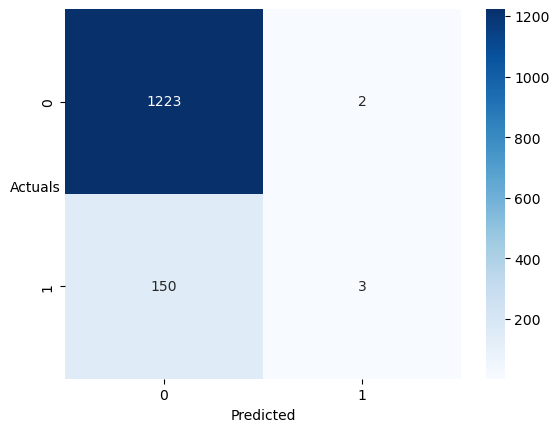

In [90]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [91]:
recall = 3/(3+150)
recall

0.0196078431372549

In [92]:
precision = 3/(2+3)
precision

0.6

In [93]:
y_prob_pred_7 = model_7.predict()

In [94]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [95]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.14814658322761734

In [96]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.14:
        a=1
    else:
        a=0
    y_class_pred.append(a)

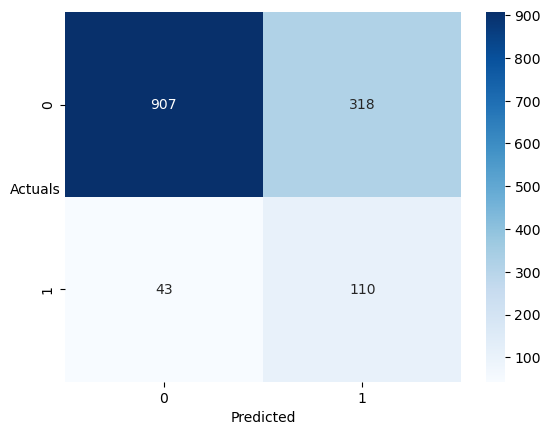

In [97]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [98]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.955     0.740     0.834      1225
           1      0.257     0.719     0.379       153

    accuracy                          0.738      1378
   macro avg      0.606     0.730     0.606      1378
weighted avg      0.877     0.738     0.783      1378



#### Validating on the test set

In [99]:
y_prob_pred_test = model_7.predict(Default_test)

In [100]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.14:
        a=1
    else:
        a=0
    y_class_pred.append(a)

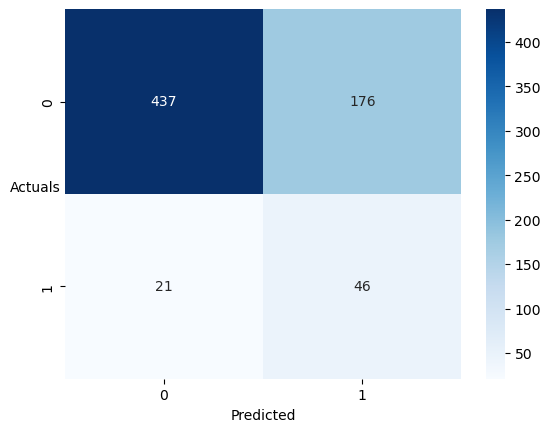

In [101]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [102]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.954     0.713     0.816       613
           1      0.207     0.687     0.318        67

    accuracy                          0.710       680
   macro avg      0.581     0.700     0.567       680
weighted avg      0.881     0.710     0.767       680



#### Observation
- this model seems to be not overfiting on threshold 0.14

## Linear Discriminant Analysis

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [104]:
LDA = LinearDiscriminantAnalysis()

In [105]:
lda_model = LDA.fit(X_train, y_train)

In [106]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [107]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1225
           1       0.50      0.01      0.03       153

    accuracy                           0.89      1378
   macro avg       0.70      0.51      0.48      1378
weighted avg       0.85      0.89      0.84      1378



In [108]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       613
           1       0.33      0.01      0.03        67

    accuracy                           0.90       680
   macro avg       0.62      0.51      0.49       680
weighted avg       0.85      0.90      0.86       680



In [109]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [110]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [111]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.12826066394195645

In [112]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)

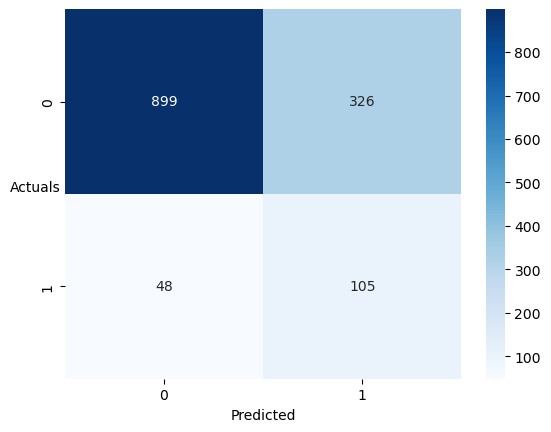

In [113]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [114]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.949     0.734     0.828      1225
           1      0.244     0.686     0.360       153

    accuracy                          0.729      1378
   macro avg      0.596     0.710     0.594      1378
weighted avg      0.871     0.729     0.776      1378



In [115]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)

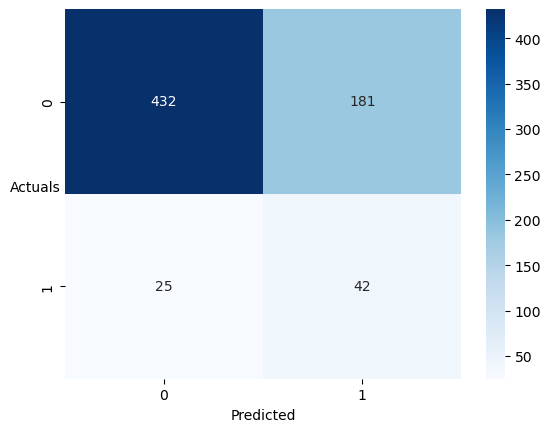

In [116]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [117]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.945     0.705     0.807       613
           1      0.188     0.627     0.290        67

    accuracy                          0.697       680
   macro avg      0.567     0.666     0.549       680
weighted avg      0.871     0.697     0.756       680



## Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [119]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [120]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 25}

In [121]:
best_grid = grid_search.best_estimator_

In [122]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [123]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1225
           1       0.97      0.24      0.38       153

    accuracy                           0.91      1378
   macro avg       0.94      0.62      0.67      1378
weighted avg       0.92      0.91      0.89      1378



In [124]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       613
           1       0.50      0.03      0.06        67

    accuracy                           0.90       680
   macro avg       0.70      0.51      0.50       680
weighted avg       0.86      0.90      0.86       680



#### data Overview

In [125]:
data.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.08

In [126]:
data.Default.value_counts()

0    1838
1     220
Name: Default, dtype: int64

### univariate 

In [127]:
data.columns

Index(['Co_Code', 'Co_Name', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_pers

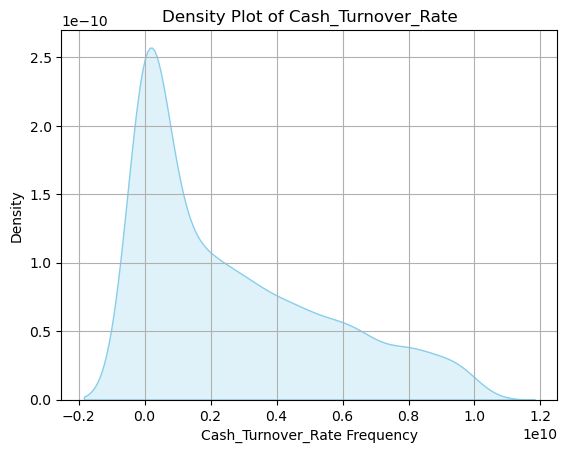

In [128]:
sns.kdeplot(
    data._Cash_Turnover_Rate,
    shade=True,  
    color="skyblue"  
)

plt.title('Density Plot of Cash_Turnover_Rate')
plt.xlabel('Cash_Turnover_Rate Frequency')
plt.ylabel('Density')
plt.grid(True)
plt.show()

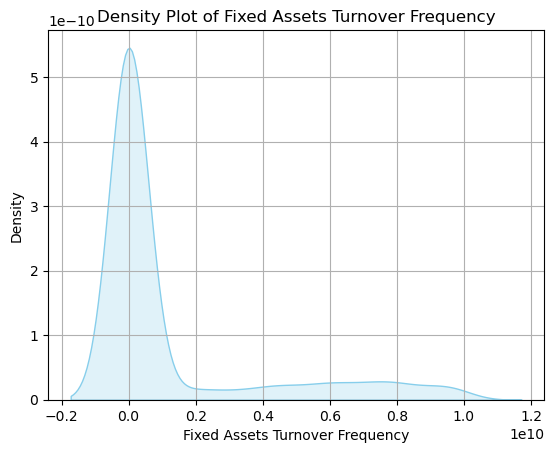

In [129]:
sns.kdeplot(
    data._Fixed_Assets_Turnover_Frequency,
    shade=True,  
    color="skyblue"  
)

plt.title('Density Plot of Fixed Assets Turnover Frequency')
plt.xlabel('Fixed Assets Turnover Frequency')
plt.ylabel('Density')
plt.grid(True)
plt.show()


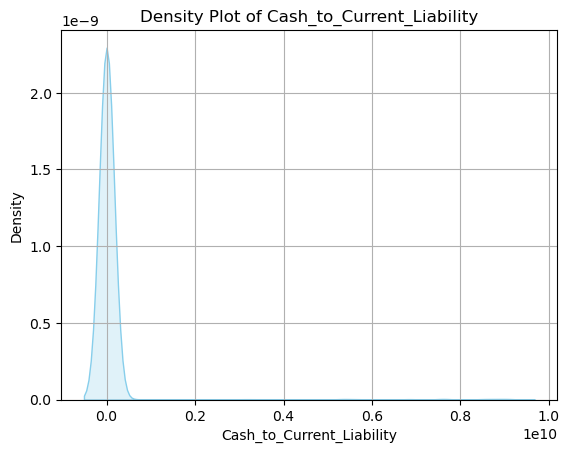

In [130]:
sns.kdeplot(
    data._Cash_to_Current_Liability,
    shade=True,  
    color="skyblue"  
)

plt.title('Density Plot of Cash_to_Current_Liability')
plt.xlabel('Cash_to_Current_Liability')
plt.ylabel('Density')
plt.grid(True)
plt.show()


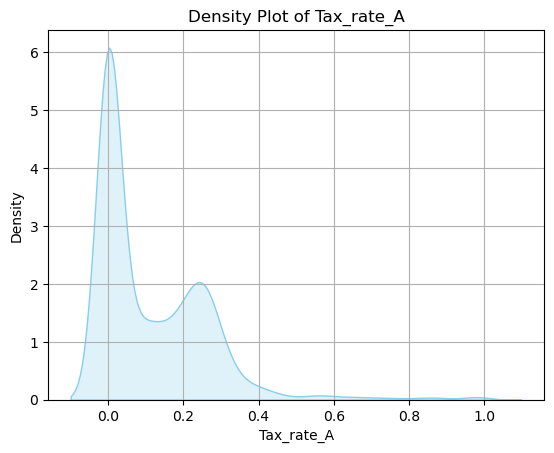

In [131]:
sns.kdeplot(
    data._Tax_rate_A,
    shade=True,  
    color="skyblue"  
)

plt.title('Density Plot of Tax_rate_A')
plt.xlabel('Tax_rate_A')
plt.ylabel('Density')
plt.grid(True)
plt.show()

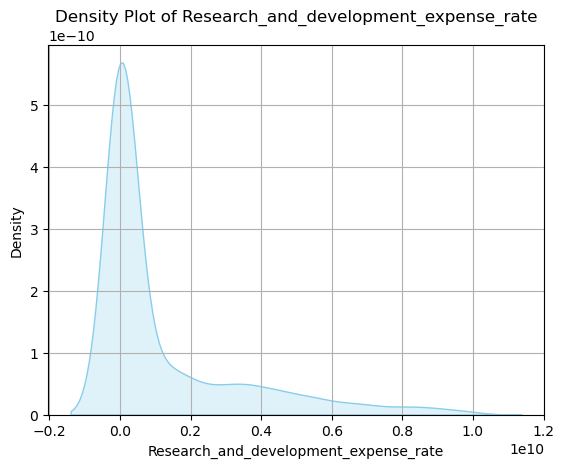

In [132]:
sns.kdeplot(
    data._Research_and_development_expense_rate,
    shade=True,  
    color="skyblue"  
)

plt.title('Density Plot of Research_and_development_expense_rate')
plt.xlabel('Research_and_development_expense_rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

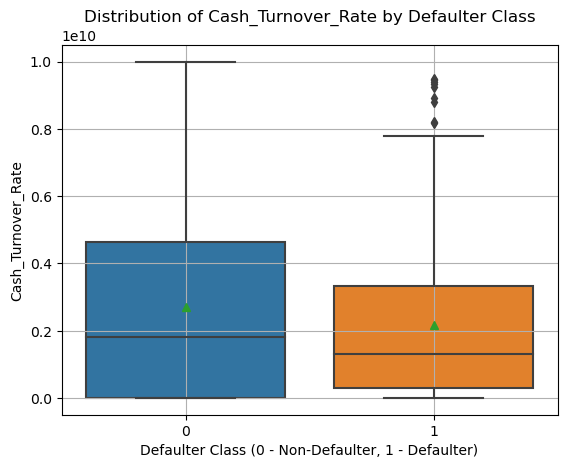

In [133]:
sns.boxplot(
    x = "Default",
    y = "_Cash_Turnover_Rate",
    showmeans=True,  
    data=data
)

plt.title('Distribution of Cash_Turnover_Rate by Defaulter Class')
plt.xlabel('Defaulter Class (0 - Non-Defaulter, 1 - Defaulter)')
plt.ylabel('Cash_Turnover_Rate')
plt.grid(True)
plt.show()


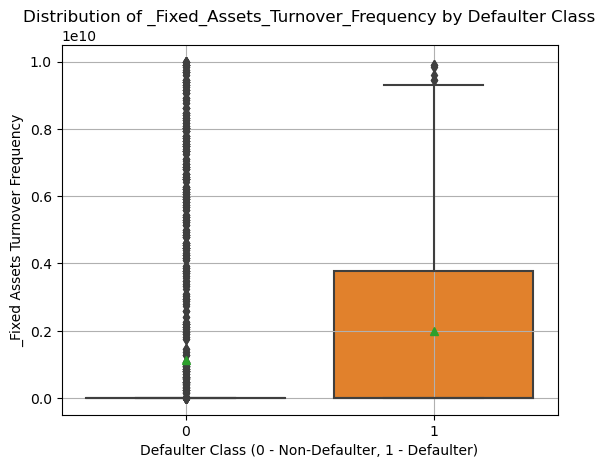

In [134]:
sns.boxplot(
    x = "Default",
    y = "_Fixed_Assets_Turnover_Frequency",
    showmeans=True,  
    data=data
)

plt.title('Distribution of _Fixed_Assets_Turnover_Frequency by Defaulter Class')
plt.xlabel('Defaulter Class (0 - Non-Defaulter, 1 - Defaulter)')
plt.ylabel('_Fixed Assets Turnover Frequency')
plt.grid(True)
plt.show()

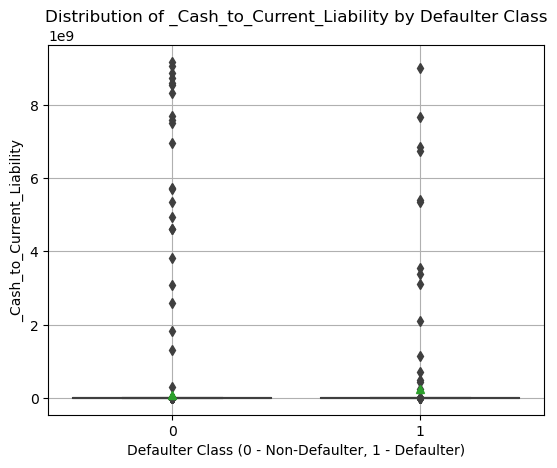

In [135]:
sns.boxplot(
    x = "Default",
    y = "_Cash_to_Current_Liability",
    showmeans=True,  
    data=data
)

plt.title('Distribution of _Cash_to_Current_Liability by Defaulter Class')
plt.xlabel('Defaulter Class (0 - Non-Defaulter, 1 - Defaulter)')
plt.ylabel('_Cash_to_Current_Liability')
plt.grid(True)
plt.show()

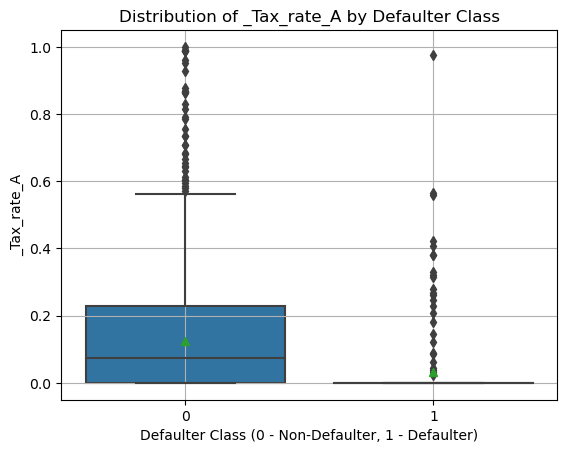

In [136]:
sns.boxplot(
    x = "Default",
    y = "_Tax_rate_A",
    showmeans=True,  
    data=data
)

plt.title('Distribution of _Tax_rate_A by Defaulter Class')
plt.xlabel('Defaulter Class (0 - Non-Defaulter, 1 - Defaulter)')
plt.ylabel('_Tax_rate_A')
plt.grid(True)
plt.show()

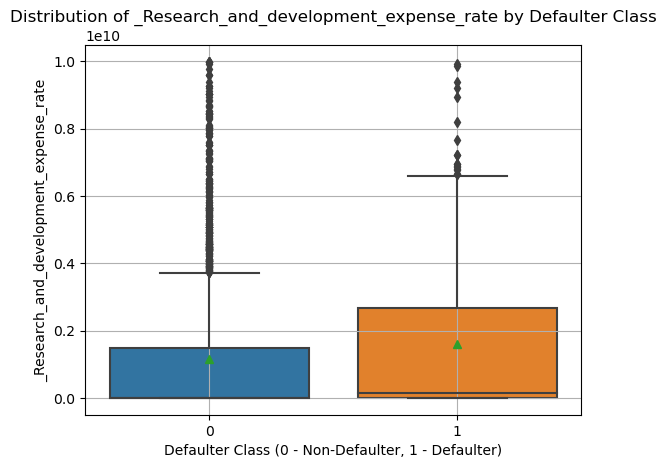

In [137]:
sns.boxplot(
    x = "Default",
    y = "_Research_and_development_expense_rate",
    showmeans=True,  
    data=data
)

plt.title('Distribution of _Research_and_development_expense_rate by Defaulter Class')
plt.xlabel('Defaulter Class (0 - Non-Defaulter, 1 - Defaulter)')
plt.ylabel('_Research_and_development_expense_rate')
plt.grid(True)
plt.show()